In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm

In [2]:
def interval_to_normal(interval, confidence=0.9):
    (nsigma,) = np.diff(norm.interval(0.9))
    mu = np.mean(interval)
    sigma = np.ptp(interval) / nsigma
    return mu, sigma

Text(0.5, 1.0, 'Kilonova luminosity functions')

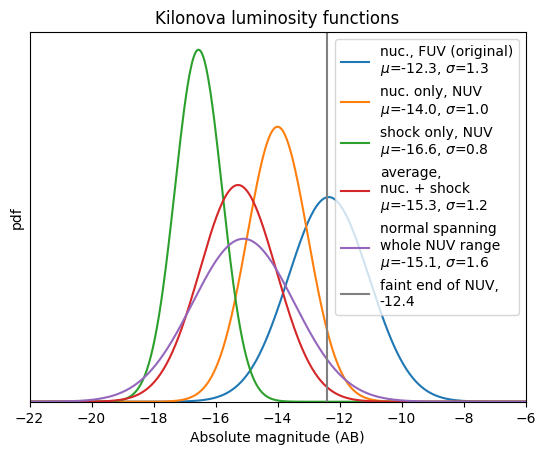

In [3]:
intervals = {"nuc. only, NUV": [-15.6, -12.4], "shock only, NUV": [-17.8, -15.3]}
mus_sigmas = np.asarray(
    [interval_to_normal(interval) for interval in intervals.values()]
)
mus, sigmas = mus_sigmas.T

fig, ax = plt.subplots()
x = np.linspace(-22, -6, 500)


def plot_dist(mu, sigma, label):
    ax.plot(
        x,
        norm(mu, sigma).pdf(x),
        label=f"{label}\n$\\mu$={np.format_float_positional(mu, 1, min_digits=1, trim='k')}, $\\sigma$={np.format_float_positional(sigma, 1, min_digits=1, trim='k')}",
    )


plot_dist(*interval_to_normal([-14.5, -10.2]), "nuc., FUV (original)")

for label, mu_sigma in zip(intervals.keys(), mus_sigmas):
    plot_dist(*mu_sigma, label)

plot_dist(np.mean(mus), np.sqrt(np.sum(np.square(sigmas))), "average,\nnuc. + shock")

plot_dist(
    *interval_to_normal(
        [
            np.asarray(list(intervals.values())).min(),
            np.asarray(list(intervals.values())).max(),
        ]
    ),
    "normal spanning\nwhole NUV range",
)

ax.axvline(-12.4, label="faint end of NUV,\n-12.4", color="gray")

ax.legend()
ax.set_xlabel("Absolute magnitude (AB)")
ax.set_ylabel("pdf")
ax.set_yticks([])
ax.set_xlim(x.min(), x.max())
ax.set_ylim(0, None)
ax.set_title("Kilonova luminosity functions")